### 3. Logistic regression

In [38]:
import pandas as pd
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('df_next.csv')
data = data.drop(columns="Unnamed: 0")
data.head(-20)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,21.0,30.0,2.0,3.0,30.0,2.0,3.0,59.0,7.0,2.0,0.0000
1,7.0,32.0,70.0,2.0,4.0,68.0,2.0,4.0,134.0,7.0,2.0,0.0000
2,7.0,15.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,7.0,2.0,0.0000
3,7.0,33.0,77.0,2.0,7.0,73.0,2.0,7.0,144.0,7.0,2.0,0.0000
4,7.0,55.0,78.0,3.0,7.0,74.0,3.0,7.0,146.0,8.0,2.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
357916,7.0,32.0,70.0,2.0,4.0,69.0,3.0,4.0,138.0,5.0,1.0,1.0000
357917,7.0,17.0,11.0,2.0,10.0,12.0,4.0,10.0,25.0,9.0,1.0,20.1772
357918,7.0,2.0,75.0,0.0,7.0,72.0,0.0,7.0,142.0,2.0,1.0,10.0000
357919,7.0,26.0,49.0,2.0,16.0,49.0,4.0,16.0,98.0,9.0,1.0,20.0950


In [40]:
y = data.iloc[:,0].values
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])
n_classes = y.shape[1]

X = data.iloc[:,1:].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print("Shape_train:", X_train.shape, "\n"
      "Shape_test: ", X_test.shape, "\n"
      "Shape_y:    ", y.shape)

Shape_train: (239820, 11) 
Shape_test:  (118121, 11) 
Shape_y:     (357941, 8)


In [41]:
scaler = StandardScaler()
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0))

steps = [('normalizer', scaler),('classifier', clf)]
pipe_log_ = Pipeline(steps)

In [42]:
pipe_log_reg = pipe_log_.fit(X_train, y_train)

y_pred_train = pipe_log_reg.predict(X_train)
y_pred_test = pipe_log_reg.predict(X_test)
y_score_log_reg = pipe_log_reg.decision_function(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sn

In [44]:
target_names = ['DoS', 'Data_probing', 'Malitious_control', 'Malitious_operation', 'Scan',
                'Spying', 'Wrong_SetUp', 'Normal']
print(classification_report(y_train, y_pred_train, target_names=target_names))
print(classification_report(y_test, y_pred_test, target_names=target_names))

                     precision    recall  f1-score   support

                DoS       0.96      0.66      0.78      3841
       Data_probing       1.00      0.57      0.73       217
  Malitious_control       0.97      0.92      0.94       586
Malitious_operation       1.00      0.50      0.66       511
               Scan       0.95      0.42      0.58      1046
             Spying       0.00      0.00      0.00       367
        Wrong_SetUp       0.92      1.00      0.96        73
             Normal       0.98      1.00      0.99    233179

          micro avg       0.98      0.99      0.99    239820
          macro avg       0.85      0.63      0.71    239820
       weighted avg       0.98      0.99      0.98    239820
        samples avg       0.98      0.99      0.99    239820

                     precision    recall  f1-score   support

                DoS       0.96      0.65      0.77      1939
       Data_probing       1.00      0.61      0.76       125
  Malitious_control 

##### Confusion matrix multiclass (Logistic Regression)

In [45]:
confusion_m = confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

def plot_confusion_matrix(confusion_m, classes,
                          normalize=False,
                          title=' ',
                          cmap=plt.cm.BuPu):

    import itertools
    if normalize:
        confusion_m = confusion_m.astype('float') / confusion_m.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix (Normalized)")
    else:
        print('Confusion matrix (without_normalization)')

    print(confusion_m)

    plt.imshow(confusion_m, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion_m.max() / 2.
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
        plt.text(j, i, format(confusion_m[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if confusion_m[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix (without_normalization)
[[  1252      0      0      0      0      0      0    687]
 [     0     76      0      0      0      0      0     49]
 [     0      0    281      0      0      0      0     22]
 [     0      0      0    133      0      0      0    161]
 [     4      0      3      0    221      0      0    273]
 [     0      0      0      0     12      0      0    153]
 [     0      0      0      0      0      0     49      0]
 [   144      0      3      0      2      0      0 114596]]


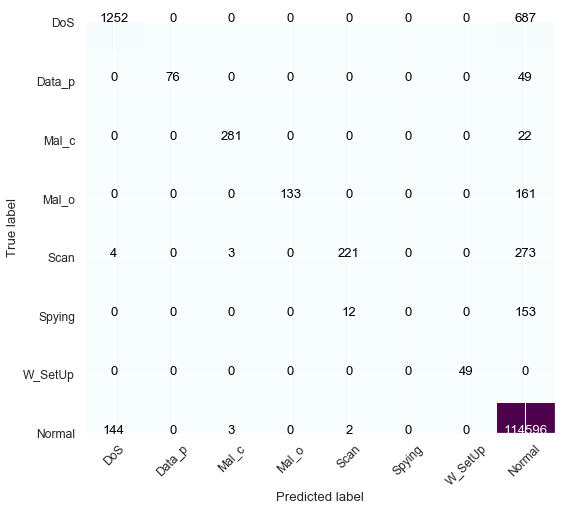

In [46]:
plt.figure(figsize = (8,8))
sn.set(font_scale=1.1)

plot_confusion_matrix(confusion_m,['DoS', 'Data_p', 'Mal_c', 'Mal_o', 'Scan',
                'Spying', 'W_SetUp', 'Normal'])
plt.show()

##### Matthews correlation coefficient (Logistic Regression)

In [47]:
matthews_corrcoef(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))

0.7412488340017231